# Lecture 3 - SMILES and RDKit

> Start with the SMILES language, practice tiny steps, then use RDKit to draw, edit, and analyze molecules. Finish with PubChem lookups.


```{contents}
:local:
:depth: 1
```

## Learning goals

- Read SMILES strings with confidence: atoms, bonds, branches, rings, aromaticity, charges, simple stereochemistry.
- Use RDKit to parse SMILES, draw structures, add hydrogens, and compute basic properties.
- Make small edits: replace atoms, neutralize groups, split salts, add a methyl group with a graph edit.
- Query PubChem after you can edit molecules locally, then round-trip to SMILES and files.

[![Colab](https://img.shields.io/badge/Open-Colab-orange)](https://colab.research.google.com/drive/184RYVf-aXx2PfOauFp7xw8LIrqJiiWW6?usp=sharing) 
---


## 1. SMILES

**What is SMILES?**

SMILES (Simplified Molecular Input Line Entry System) is a compact way to describe a molecule using only a line of text. It turns molecular structures into strings that are easy for both humans and computers to read.

Each atom is represented by its atomic symbol: `C` for carbon, `O` for oxygen, etc.

Bonds are shown with symbols: single bonds are implicit, `=` is a double bond, `#` is a triple bond.

Branches are placed in parentheses: `CC(O)C` means a side group on the middle carbon.

Ring structures use numbers to show where the ring closes: `C1CCCCC1` is cyclohexane.

Charges, isotopes, and stereochemistry can also be encoded.

Because it’s text, SMILES is great for storing, comparing, and searching molecules in code and databases. RDKit can take a SMILES string, reconstruct the molecule, and let you visualize or analyze it.

For more information: *J. Chem. Inf. Comput. Sci.* 1988, 28 (1), 31–36 [![Read](https://img.shields.io/badge/Read-Paper-blue)](https://pubs.acs.org/doi/10.1021/ci00057a005)

Now, let's get started!

If you use Colab, run the install cell below first.

In [1]:
# Install only if needed
try:
    import rdkit
    from rdkit import Chem
    from rdkit.Chem import Draw, Descriptors, Crippen, rdMolDescriptors
except Exception:
    %pip install rdkit

### 1.1 Atoms

- Organic set without brackets: `B C N O P S F Cl Br I`.  
- Hydrogens are usually implicit.  
- Charges or unusual valence use brackets.

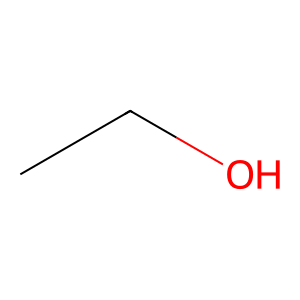

In [2]:
# Plain strings to focus on notation
ethanol = "CCO"         # C-C-O
mol_1 = Chem.MolFromSmiles(ethanol)
Draw.MolToImage(mol_1)

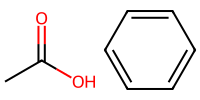

In [3]:
acetic = "CC(=O)O"      # C-C with a double bonded O and an OH
benzene = "c1ccccc1"    # aromatic ring

mol_2 = Chem.MolFromSmiles(acetic)
mol_3 = Chem.MolFromSmiles(benzene)

# Draw both molecules side by side
Draw.MolsToImage([mol_2, mol_3], molsPerRow=2, subImgSize=(100,100))

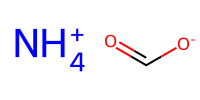

In [4]:
charged1 = "[NH4+]"     # ammonium
charged2 = "C(=O)[O-]"  # carboxylate
mol_c1 = Chem.MolFromSmiles(charged1)
mol_c2 = Chem.MolFromSmiles(charged2)

Draw.MolsToImage([mol_c1, mol_c2], molsPerRow=1, subImgSize=(100,100))


### 1.2 Bonds

- Single is implied.  
- `=` is double.  
- `#` is triple.

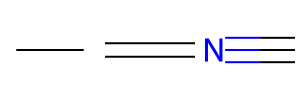

In [5]:
single = "CC"
double = "C=C"
triple = "C#N"

mols = [Chem.MolFromSmiles(bond) for bond in [single, double, triple]]

Draw.MolsToImage(mols, molsPerRow=1, subImgSize=(100,100))



### 1.3 Branches

- Parentheses create side branches.

CC(O)CC CC(C)OC


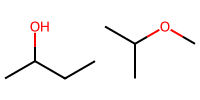

In [6]:
isopropanol_a = "CC(O)CC"
isopropanol_b = "CC(C)OC"    # same structure, different order
print(isopropanol_a, isopropanol_b)

mol_a = Chem.MolFromSmiles(isopropanol_a)
mol_b = Chem.MolFromSmiles(isopropanol_b)

Draw.MolsToImage([mol_a, mol_b], molsPerRow=2, subImgSize=(100,100))



### 1.4 Rings

- Numbers open and close rings.  
- Same digit appears twice to close that ring.

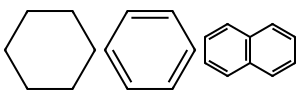

In [7]:
cyclohexane = "C1CCCCC1"
benzene = "c1ccccc1"
naphthalene = "c1cccc2c1cccc2"

mols = [Chem.MolFromSmiles(ring) for ring in [cyclohexane, benzene, naphthalene]]

Draw.MolsToImage(mols, molsPerRow=3, subImgSize=(100,100))


### 1.5 Aromatic vs aliphatic

- Aromatic atoms are lower case.  
- Aliphatic are upper case.

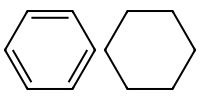

In [8]:
mol_aromatic = Chem.MolFromSmiles("c1ccccc1")
mol_aliphatic = Chem.MolFromSmiles("C1CCCCC1")

Draw.MolsToImage([ mol_aromatic, mol_aliphatic], molsPerRow=3, subImgSize=(100,100))

```{note}
What the digits mean:
A number marks a ring connection. The same digit appears twice on the two atoms that are bonded to each other to close that ring.
For fused systems, you can reuse different digits to show where each ring closes.
```

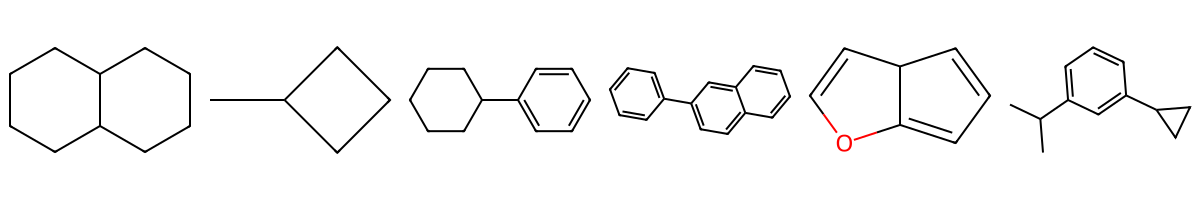

In [9]:
ring1 = Chem.MolFromSmiles("C1CCC2CCCCC2C1")
ring2 = Chem.MolFromSmiles("C1CC(C)C1")
ring3 = Chem.MolFromSmiles("c1ccc(C2CCCCC2)cc1")
ring4 = Chem.MolFromSmiles("c1ccc(-c2ccc3ccccc3c2)cc1")
ring5 = Chem.MolFromSmiles("C1=CC2C=COC2=C1")
ring6 = Chem.MolFromSmiles("CC(C)c1cccc(C2CC2)c1")

Draw.MolsToImage([ring1,ring2, ring3, ring4, ring5, ring6], ubImgSize=(100,100))

### 1.6 Charges and salts

- Use `.` to separate parts in a salt.  
- Place charge in brackets on the atom.

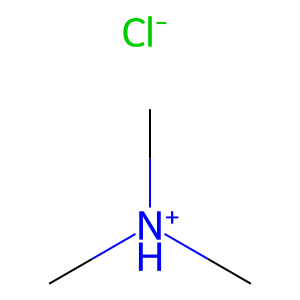

In [10]:
salt = "C[NH+](C)C.[Cl-]"    # trimethylammonium chloride
Draw.MolToImage(Chem.MolFromSmiles(salt ), molsPerRow=1, subImgSize=(100,100))


### 1.7 Simple stereochemistry

- E and Z for alkenes use slashes.  
- `Cl/C=C/Cl` is E. `Cl/C=C\Cl` is Z.

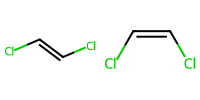

In [11]:

mol_E = Chem.MolFromSmiles("Cl/C=C/Cl")
mol_Z = Chem.MolFromSmiles("Cl/C=C\\Cl")

Draw.MolsToImage([ mol_E, mol_Z], molsPerRow=3, subImgSize=(100,100))



```{admonition} Try
Search online SMILES for these and print them:
- isopropyl alcohol
- benzoate anion
- cyclopropane
- pyridine
```

```{admonition} Try
Search online SMILES for these and print them:
- isopropyl alcohol
- benzoate anion
- cyclopropane
- pyridine
```

---

## 2. RDKit quick start

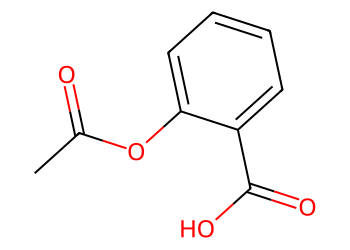

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, Crippen, rdMolDescriptors

smi = "CC(=O)OC1=CC=CC=C1C(=O)O"  # aspirin
mol = Chem.MolFromSmiles(smi)
Draw.MolToImage(mol, size=(350, 250))

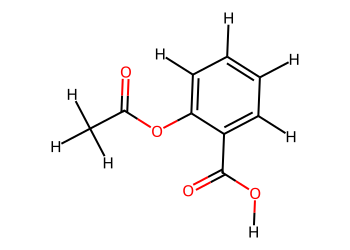

In [13]:
# Add hydrogens for clarity
mol_H = Chem.AddHs(mol)
Draw.MolToImage(mol_H, size=(350, 250))

In [14]:
# Quick properties in one place
mw = Descriptors.MolWt(mol)
logp = Crippen.MolLogP(mol)
hbd = rdMolDescriptors.CalcNumHBD(mol)
hba = rdMolDescriptors.CalcNumHBA(mol)
tpsa = rdMolDescriptors.CalcTPSA(mol)
print("MolWt", round(mw,2), "LogP", round(logp,2), "HBD", hbd, "HBA", hba, "TPSA", round(tpsa,1))

MolWt 180.16 LogP 1.31 HBD 1 HBA 3 TPSA 63.6


```{note}
**MolWt** → The molecular weight (molar mass) of the compound, measured in grams per mole.

**LogP** → The logarithm of the partition coefficient (octanol/water); higher values mean more lipophilic (hydrophobic).

**HBD** (Hydrogen Bond Donors) → Atoms (often OH or NH groups) that can donate a hydrogen in hydrogen bonding.

**HBA** (Hydrogen Bond Acceptors) → Atoms (such as oxygen or nitrogen) that can accept a hydrogen bond.

**TPSA** (Topological Polar Surface Area) → A measure of the molecule’s polar area, correlated with solubility and permeability.
```

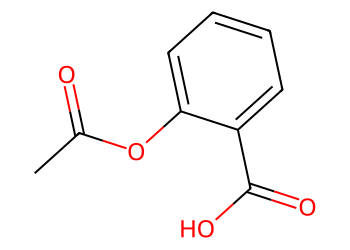

In [15]:
# Show atom numbers to plan edits
img = Draw.MolToImage(mol, size=(350, 250), includeAtomNumbers=True)
img

```{admonition} Practice
Change `smi` to caffeine or acetaminophen. Compare MolWt and TPSA.
```

---

## 3. Small edits in RDKit

We will avoid pattern languages here. We will use plain molecules to find and replace common pieces.

### 3.1 Replace atom type by matching a small molecule

Replace all chlorine atoms with fluorine in an aryl chloride.

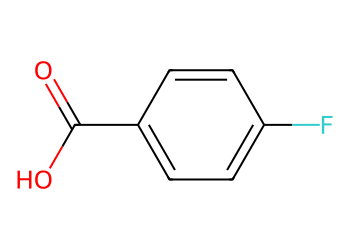

In [16]:
from rdkit import Chem
from rdkit.Chem import Draw

qry = Chem.MolFromSmiles("Cl")     # what to find
rep = Chem.MolFromSmiles("F")      # what to place
mol = Chem.MolFromSmiles("Clc1ccc(cc1)C(=O)O")

out = Chem.ReplaceSubstructs(mol, qry, rep, replaceAll=True)[0]
Draw.MolToImage(out, size=(350, 250))

### 3.2 Neutralize a carboxylate

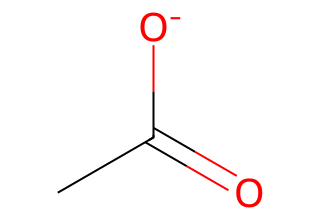

In [17]:
mol = Chem.MolFromSmiles("CC(=O)[O-]")
find = Chem.MolFromSmiles("[O-]")  # anionic oxygen as a molecule
put  = Chem.MolFromSmiles("O")
mol_neutral = Chem.ReplaceSubstructs(mol, find, put, replaceAll=True)[0]
Draw.MolToImage(mol_neutral, size=(320, 220))

### 3.3 Add a methyl group with a graph edit

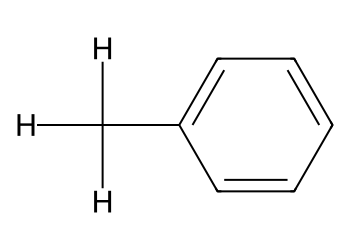

In [18]:
mol = Chem.MolFromSmiles("c1ccccc1")  # benzene
em = Chem.EditableMol(mol)

idx_C = em.AddAtom(Chem.Atom("C"))
idx_H1 = em.AddAtom(Chem.Atom("H"))
idx_H2 = em.AddAtom(Chem.Atom("H"))
idx_H3 = em.AddAtom(Chem.Atom("H"))

em.AddBond(2, idx_C, order=Chem.BondType.SINGLE)  # attach at atom index 2
em.AddBond(idx_C, idx_H1, order=Chem.BondType.SINGLE)
em.AddBond(idx_C, idx_H2, order=Chem.BondType.SINGLE)
em.AddBond(idx_C, idx_H3, order=Chem.BondType.SINGLE)

mol2 = em.GetMol()
Chem.SanitizeMol(mol2)
Draw.MolToImage(mol2, size=(350, 250), includeAtomNumbers=True)

```{admonition} Tip
After graph edits, call `Chem.SanitizeMol` to check valence and aromaticity.
```

---

## 3.4 Why use `EditableMol` instead of just SMILES edits?

Text edits to SMILES can hit the wrong atom or make an invalid string. `EditableMol` lets you target an atom index, keep valence correct, and apply the same change across many molecules in a repeatable way.

Now consider below example:
**add a methyl group to atom index 2 across 7 inputs**

In [19]:
smiles_list = [  
    "c1ccccc1",            # benzene
    "Oc1ccccc1",           # phenol
    "Nc1ccccc1",           # aniline
    "Clc1ccccc1",          # chlorobenzene
    "c1ccncc1",            # pyridine
    "O=C(O)c1ccccc1",      # benzoic acid
    "OCCc1ccccc1",         # benzyl alcohol
]  

In [20]:
def add_methyl(smi):  
    mol = Chem.MolFromSmiles(smi)  # parse SMILES to molecule
    if mol is None or mol.GetNumAtoms() < 3:  # quick guard for bad/short inputs
        return None  # signal failure
    em = Chem.EditableMol(mol)  # enter editable graph mode
    c_idx = em.AddAtom(Chem.Atom("C"))  # add the methyl carbon
    for _ in range(3):  # add three hydrogens
        h = em.AddAtom(Chem.Atom("H"))  # create a hydrogen atom
        em.AddBond(c_idx, h, Chem.BondType.SINGLE)  # connect H to C
    em.AddBond(2, c_idx, Chem.BondType.SINGLE)  # attach methyl C to atom index 2
    newmol = em.GetMol()  # exit edit mode
    Chem.SanitizeMol(newmol)  # check valence/aromaticity
    return newmol  # return edited molecule

In [21]:
for smi in smiles_list:  # iterate over the 7 SMILES
    mol2 = add_methyl(smi)  # attempt the methyl add
    out = Chem.MolToSmiles(mol2) if mol2 else "failed"  # convert to output SMILES or flag
    print("IN :", smi)  # show input
    print("---------------------")  
    print("OUT:", out)  # show output
    print("---------------------")

IN : c1ccccc1
---------------------
OUT: [H]C([H])([H])c1ccccc1
---------------------
IN : Oc1ccccc1
---------------------
OUT: [H]C([H])([H])c1ccccc1O
---------------------
IN : Nc1ccccc1
---------------------
OUT: [H]C([H])([H])c1ccccc1N
---------------------
IN : Clc1ccccc1
---------------------
OUT: [H]C([H])([H])c1ccccc1Cl
---------------------
IN : c1ccncc1
---------------------
OUT: [H]C([H])([H])c1ccccn1
---------------------
IN : O=C(O)c1ccccc1
---------------------
OUT: [H]C([H])([H])OC(=O)c1ccccc1
---------------------
IN : OCCc1ccccc1
---------------------
OUT: [H]C([H])([H])C(CO)c1ccccc1
---------------------


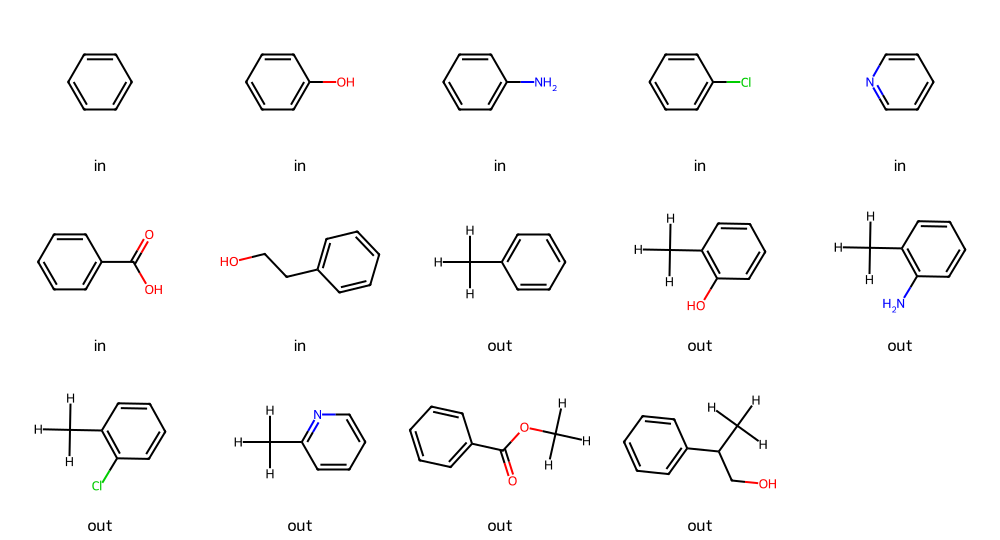

In [22]:
mols_in  = [Chem.MolFromSmiles(s) for s in smiles_list]  # make inputs as mols
mols_out = [add_methyl(s) for s in smiles_list]  # make edited outputs

Draw.MolsToGridImage(  # draw a grid to compare
    mols_in + mols_out,  # originals then edits
    molsPerRow=5,  # how many per row
    subImgSize=(200,180),  # image size
    legends=["in"]*len(mols_in)+["out"]*len(mols_out),  # labels
    useSVG=True  # SVG for crisp display
)  # end drawing

---
## 4. Canonicalization and similarity

### 4.1 Canonicalization

SMILES strings are compact and easy to use, but there is a catch: they are not guaranteed to be unique.  
The same molecule can be written with different SMILES depending on how the atoms are traversed. This makes it difficult to compare molecules directly.

In the example below we take three different SMILES notations, each of which corresponds to the molecule we have on quiz.  
Although the strings differ, the structures are identical once interpreted by RDKit.

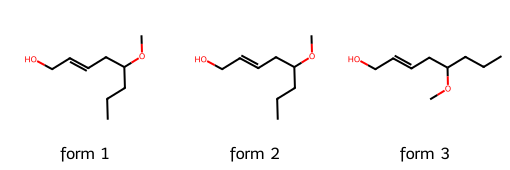

In [23]:
from rdkit import Chem
from rdkit.Chem import Draw

# Three equivalent SMILES
smile1 = "OCC=CCC(OC)CCC"
smile2 = "COC(CCC)CC=CCO"
smile3 = "CCCC(OC)CC=CCO"

smiles_list = [smile1, smile2, smile3]
mols = [Chem.MolFromSmiles(s) for s in smiles_list]
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(170,170),
                     legends=[f"form {i+1}" for i in range(len(mols))])

```{note}
Different SMILES strings can represent the same molecule. This is useful for flexibility, but problematic if we want a **unique key** for each compound.  
Canonicalization generates a standard SMILES for each molecule, which allows unambiguous comparisons and avoids duplicates.
```

In [24]:
def canonicalize_smiles(smiles):
    m = Chem.MolFromSmiles(smiles)
    return Chem.MolToSmiles(m) if m is not None else None

for s in smiles_list:
    print(s, " -> ", canonicalize_smiles(s))

OCC=CCC(OC)CCC  ->  CCCC(CC=CCO)OC
COC(CCC)CC=CCO  ->  CCCC(CC=CCO)OC
CCCC(OC)CC=CCO  ->  CCCC(CC=CCO)OC


```{note}
Canonicalization is not universal: RDKit and Open Babel may output different canonical strings for the same molecule.  
The important part is consistency within your workflow—use the same toolkit throughout.
```

### 4.2 Morgan fingerprints and Tanimoto

Another way to compare molecules is not by SMILES text but by molecular features.  
Fingerprints encode the presence or absence of atom environments in a binary vector. Morgan fingerprints (circular fingerprints) are widely used.

So, what is a fingerprint?

- Think of a fingerprint as a barcode for a molecule.

- Each bar (or bit) in the barcode answers a yes/no question: Does the molecule contain this feature?

Example features: “*Does it have a benzene ring?*”, “*Does it have an OH group?*”, “*Does it have a nitrogen atom with three bonds?*”

If the answer is yes, the bit is `1`. If not, it’s `0`.
This gives us a long string of `0`s and 1s that represents the molecule.

That's said, Morgan fingerprints are a special kind of barcode. They look around each atom in the molecule and record the neighborhood (atoms directly attached, then atoms two steps away, etc.). The “radius” tells how far you look from each atom. Radius 2 means: “look two bonds away.” Morgan fingerprints are popular because they do a good job at capturing local environments around atom.

In [25]:
from rdkit.Chem import rdFingerprintGenerator
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=512)

methane = Chem.MolFromSmiles("C") # replace with other SMILES strings to see how it changes!
caffeine = Chem.MolFromSmiles("Cn1cnc2c1c(=O)n(C)c(=O)n2C")
fp_me = mfpgen.GetFingerprint(methane)
fp_caff = mfpgen.GetFingerprint(caffeine)

from rdkit import DataStructs
print(fp_me.ToBitString())
print("----------------")
print(fp_caff.ToBitString())



00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
----------------
10000000000000000000000000000000010000000000000000001000000000000000000000000000000000000000000000000000000000000000000001000000000000000010000000000000000000001000000000000000000100000000000000000000000000000000000000000000000000000010000000000000000000000001000000000000000000000001000000000000000000000000000000100000000000000010000001000000000000000000100000000000000000000010000001000000000000001000000000000000100010010000100000000000000000000000000000000001000000

We can then measure how similar two fingerprints are with the **Tanimoto coefficient**.

It is one of the most common metrics for comparing chemical fingerprints and it measures how similar two molecules are by comparing their structural features represented as bit-vectors.

In terms of the formula, if we have two bit-vectors **A** and **B**:

- **a** = number of bits set to 1 in **A**  
- **b** = number of bits set to 1 in **B**  
- **c** = number of common bits set to 1 in both **A** and **B**  

Then the **Tanimoto similarity** is:

$$
T(A,B) = \frac{c}{a + b - c}
$$

---


- The numerator **c** counts the shared features (substructures present in both molecules).  
- The denominator counts **all unique features** across both molecules, subtracting the overlap.  
- The result ranges between **0 and 1**:  
  - `0` → no similarity at all.  
  - `1` → identical fingerprints.  

---

Suppose we compare **caffeine** and **theobromine** with Morgan fingerprints.

- Caffeine has about 250 “on” bits (features).  
- Theobromine has about 240 “on” bits.  
- They share about 180 bits.  

$$
T = \frac{180}{250 + 240 - 180} = \frac{180}{310} \approx 0.58
$$

This means caffeine and theobromine share **58% of their features**.

By contrast, comparing caffeine with **phenol** may yield ~0.15, showing much weaker similarity.



```{note}
- Tanimoto is equivalent to the **Jaccard index** used in other fields.  
- Other similarity measures exist (Dice, Cosine, Hamming), but Tanimoto remains the standard in cheminformatics.  
- Choice of fingerprint (Morgan, MACCS, topological) influences the score.  
```

In [26]:
from rdkit.Chem import rdFingerprintGenerator
from rdkit.DataStructs import FingerprintSimilarity

caffeine = Chem.MolFromSmiles("Cn1cnc2c1c(=O)n(C)c(=O)n2C")
theobromine = Chem.MolFromSmiles("Cn1c(=O)c2[nH]c(nc2n(C)c1=O)C")
phenol = Chem.MolFromSmiles("c1ccccc1O")

mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)

fp_caff = mfpgen.GetFingerprint(caffeine)
fp_theo = mfpgen.GetFingerprint(theobromine)
fp_phenol = mfpgen.GetFingerprint(phenol)

print("Caffeine vs theobromine:", round(FingerprintSimilarity(fp_caff, fp_theo),3))
print("Caffeine vs phenol     :", round(FingerprintSimilarity(fp_caff, fp_phenol),3))

Caffeine vs theobromine: 0.389
Caffeine vs phenol     : 0.061


```{note}
Notice how caffeine and theobromine have a high similarity because they share a xanthine core.  
Phenol is much less similar since it only shares a benzene ring fragment with caffeine.
```

### 4.3 Bemis–Murcko scaffold

To simplify molecules further we can extract their **scaffolds**, which keep the core ring system and linkers but discard side chains.

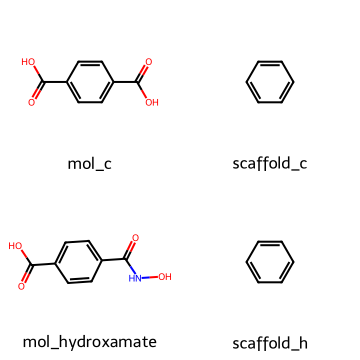

In [27]:
from rdkit.Chem.Scaffolds import MurckoScaffold

mol_carboxy = Chem.MolFromSmiles("O=C(O)c1ccc(C(=O)O)cc1")
mol_hydroxamate = Chem.MolFromSmiles("O=C(O)c1ccc(C(=O)NO)cc1")

scaf_c = MurckoScaffold.GetScaffoldForMol(mol_carboxy )
scaf_h = MurckoScaffold.GetScaffoldForMol(mol_hydroxamate)

Draw.MolsToGridImage([mol_carboxy, scaf_c , mol_hydroxamate, scaf_h ],
                     legends=["mol_c", "scaffold_c", "mol_hydroxamate", "scaffold_h"],
                     molsPerRow=2, subImgSize=(180,180))

Both of the two molecules above share the same benzene scaffold substructure.

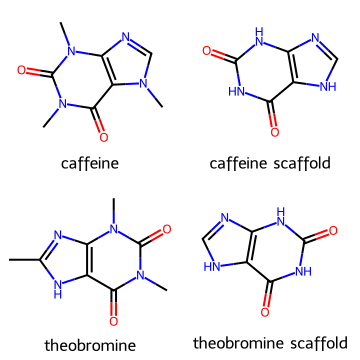

In [28]:
from rdkit.Chem.Scaffolds import MurckoScaffold


scaf_caff = MurckoScaffold.GetScaffoldForMol(caffeine)
scaf_theo = MurckoScaffold.GetScaffoldForMol(theobromine)

Draw.MolsToGridImage([caffeine, scaf_caff, theobromine, scaf_theo],
                     legends=["caffeine", "caffeine scaffold", "theobromine", "theobromine scaffold"],
                     molsPerRow=2, subImgSize=(180,180))

```{note}
Scaffolds are useful in medicinal chemistry to group compounds into families.  
Different analogs may have the same core scaffold but different substituents that tune activity or solubility.
```

---

## 5. RDKit with pandas

Large datasets are often stored as tables. Pandas can manage these datasets, while RDKit enriches them with molecular objects and descriptors.

### 5.1 Load dataset and add molecule column

In [29]:
import pandas as pd
from rdkit.Chem import PandasTools

url = "https://raw.githubusercontent.com/zzhenglab/ai4chem/main/book/_data/organic_ligands_inventory_smiles.xlsx"

df = pd.read_excel(url, engine="openpyxl")
df = df[['Compound ID','smiles','MW']]


PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles', molCol='Mol')
df.head()

,Compound ID,smiles,MW,Mol
0,2-Methylimidazole,CC1=NC=CN1,82.106,<rdkit.Chem.rdchem.Mol object at 0x000001BD81A...
1,1-Ethyl-3-vinylimidazolium bromide,C=C[N+]1=CN(CC)C=C1.[Br-],203.083,<rdkit.Chem.rdchem.Mol object at 0x000001BD81A...
2,"1-Methyl-1,4-diazabicyclo[2.2.2]octan-1-iumchl...",[Cl-].N12CC[N+](C)(CC1)CC2,162.660,<rdkit.Chem.rdchem.Mol object at 0x000001BD81A...
3,Oxazole-4-carboxylic acid,O=C(C1=COC=N1)O,113.072,<rdkit.Chem.rdchem.Mol object at 0x000001BD81A...
4,3-Ethyl-2-methylbenzo[d]thiazol-3-ium iodide,CC[N+]1=C(C)SC2=CC=CC=C21.[I-],305.184,<rdkit.Chem.rdchem.Mol object at 0x000001BD81A...


```{note}
Adding a `Mol` column converts SMILES to RDKit molecules directly in the DataFrame.  
This makes it easy to compute descriptors row by row or draw molecules inline.
```

### 5.2 Canonicalize SMILES and compute descriptors

In [30]:
def canonicalize(smiles):
    m = Chem.MolFromSmiles(smiles)
    return Chem.MolToSmiles(m) if m else None

df['canonical_smiles'] = df['smiles'].apply(canonicalize)

Now we create a new collum 'canonical_smiles' with the canonicalized smiles.

In [31]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

desc_names = ['MolWt','TPSA','MolLogP','NumHAcceptors','NumHDonors']
calc = MolecularDescriptorCalculator(desc_names)

df_desc = df['Mol'].apply(calc.CalcDescriptors)
df_desc = pd.DataFrame(df_desc.tolist(), columns=desc_names)

df_all = pd.concat([df[['Compound ID','MW','canonical_smiles']], df_desc], axis=1)
df_all.head()

,Compound ID,MW,canonical_smiles,MolWt,TPSA,MolLogP,NumHAcceptors,NumHDonors
0,2-Methylimidazole,82.106,Cc1ncc[nH]1,82.106,28.68,0.71812,1,1
1,1-Ethyl-3-vinylimidazolium bromide,203.083,C=C[n+]1ccn(CC)c1.[Br-],203.083,8.81,-2.10000,1,0
2,"1-Methyl-1,4-diazabicyclo[2.2.2]octan-1-iumchl...",162.660,C[N+]12CCN(CC1)CC2.[Cl-],162.664,3.24,-3.23380,1,0
3,Oxazole-4-carboxylic acid,113.072,O=C(O)c1cocn1,113.072,63.33,0.37280,3,1
4,3-Ethyl-2-methylbenzo[d]thiazol-3-ium iodide,305.184,CC[n+]1c(C)sc2ccccc21.[I-],305.184,3.88,-0.47888,1,0


```{note}
Descriptors such as TPSA and LogP are common in QSAR modeling and drug-likeness rules.  
For example, Lipinski’s rule-of-five uses MolWt, LogP, HBD, and HBA thresholds.
```

### 5.3 Clean and visualize

In [32]:
df_clean = df_all.dropna()
print("Number of rows after cleaning:", len(df_clean))

Number of rows after cleaning: 102


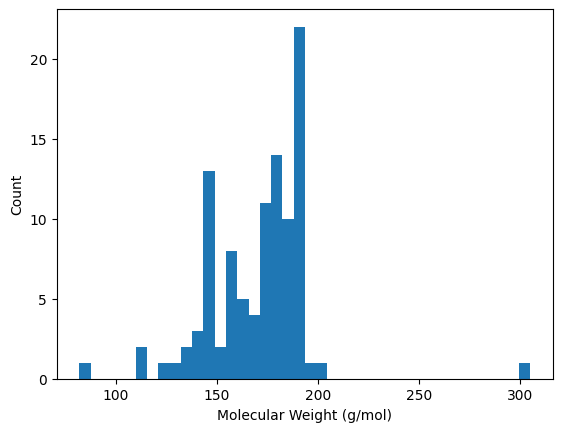

In [33]:
import matplotlib.pyplot as plt

plt.hist(df_clean['MolWt'], bins=40)
plt.xlabel("Molecular Weight (g/mol)")
plt.ylabel("Count")
plt.show()

```{note}
Cleaning removes molecules that failed parsing. Histograms allow you to inspect the distribution of properties—are most molecules small and drug-like, or large and polar?
```


---

## 6. Quick reference

```{admonition} SMILES
- Atoms: upper case aliphatic, lower case aromatic
- Bonds: implicit single, =, #
- Branches: parentheses
- Rings: digits to open and close
- Charges: bracket the atom, e.g., [O-], [NH4+]
- Salts: separate parts with a dot
- E or Z: use slashes around the double bond
```

```{admonition} RDKit
- Parse: `Chem.MolFromSmiles`
- Draw: `Draw.MolToImage(..., includeAtomNumbers=True)`
- Hydrogens: `Chem.AddHs`
- Properties: `Descriptors.MolWt`, `Crippen.MolLogP`, `CalcNumHBA/HBD`, `CalcTPSA`
- Replace piece with piece: `Chem.ReplaceSubstructs(mol, findMol, repMol)`
- Graph edit: `Chem.EditableMol`
- Save: `Chem.MolToSmiles`, `SDWriter`, PNG via `MolToImage(...).save(...)`
```

---

## 7. Glossary

```{glossary}
SMILES
  Text line notation for molecules. Example: ethanol is CCO.

aromatic
  Conjugated ring system shown with lower case atom symbols in SMILES, for example c1ccccc1.

CID
  PubChem Compound ID for a unique compound record.

sanitize
  RDKit process that checks valence, aromaticity, and stereochemistry.

descriptor
  Computed molecular property such as molecular weight or LogP.

EditableMol
  RDKit object that exposes low level atom and bond editing.

Bemis–Murcko scaffold
  The ring system and linkers that form a molecule's core framework.
```
---

## 8. In-class activity

Each task mirrors the examples above. Fill in the `...` lines. Work in pairs. Solutions are in Section 9.

### 8.1 Read a SMILES and inspect

Given `smi = "O=C(O)c1ccccc1Cl"`.  
a) Draw with atom numbers.  
b) Count number of rings.  
c) Print the list of bonds with begin and end atom indices and bond orders.

```python
from rdkit import Chem
from rdkit.Chem import Draw

smi = ...  # TO DO

mol = Chem.MolFromSmiles(smi)
display(Draw.MolToImage(mol, size=(350, 250), includeAtomNumbers=True))

num_rings = ...   # TO DO: Chem.GetSSSR(mol)
print("rings:", num_rings)

for b in mol.GetBonds():
    print("bond", b.GetIdx(), b.GetBeginAtomIdx(), "-", b.GetEndAtomIdx(), "order", int(b.GetBondTypeAsDouble()))
```

---

### 8.2 Make a small properties table

Use smiles `["Cn1cnc2N(C)C(=O)N(C)C(=O)c12", "CC(=O)Nc1ccc(O)cc1", "CC(C)Cc1ccc(cc1)C(C)C(O)=O"]`. For each, compute MolWt, LogP, HBD, HBA, and TPSA.

```python
import pandas as pd
from rdkit.Chem import Descriptors, Crippen, rdMolDescriptors

names = ...  # TO DO
rows = []
for nm in names:
    ...  #TO DO

    rows.append({
        "smiles": ...,
        "MolWt": ...,
        "LogP": ...,
        "HBD": ...,
        "HBA": ...,
        "TPSA": ...
    })

pd.DataFrame(rows)
```

---

### 8.3 Replace chlorine with fluorine

Replace Cl with F in `Clc1ccc(cc1)C(=O)O` and print the result SMILES.

```python
find = Chem.MolFromSmiles(... )  # TO DO
put  = Chem.MolFromSmiles(... )  # TO DO
mol  = ... # TO DO
out  = ... # TO DO
print(Chem.MolToSmiles(out))
```

---

### 8.4 Add a methyl group with a graph edit

Add a methyl at atom index 2 of benzene.

```python
mol = Chem.MolFromSmiles("c1ccccc1")
em = Chem.EditableMol(mol)
# TO DO: add code
Draw.MolToImage(..., size=(350, 250))
```


### 8.5 Retrieve SMILES from PubChem Draw structure, then analyze


Images to inspect:

In [34]:
from IPython.display import Image, display
# Show provided images for reference
display(Image(url="https://raw.githubusercontent.com/zzhenglab/ai4chem/main/book/_data/lec-3-structures.png"))

1. Go to **https://pubchem.ncbi.nlm.nih.gov/**.  
2. Click **Draw structure**.  
3. Paste draw the structure above, then copy the SMILES.  
4. Use the SMILES in the cell below to draw with RDKit and compute basic properties.



```python
# Paste the SMILES you obtained from PubChem Draw structure
smi1 = "..."  # smiles for image 1
smi2 = "..."  # smiles for image 2
smi3 = "..."  # smiles for image 3

m1 = Chem.MolFromSmiles(smi1)
m2 = Chem.MolFromSmiles(smi2)
m3 = Chem.MolFromSmiles(smi3)

Draw.MolsToGridImage([m1, m2, m3], legends=["img1","img2","img3"], molsPerRow=3, subImgSize=(220,200), useSVG=True)
```

```python
# Compute quick properties for the three molecules
from rdkit.Chem import Descriptors, Crippen, rdMolDescriptors
import pandas as pd

    ... # TO DO: get MolWt=..., LogP=...,HBD=...,HBA=..., TPSA=...

df = pd.DataFrame([
    {"name":"img1","smiles":smi1, ...},
    {"name":"img2","smiles":smi2, ...},
    {"name":"img3","smiles":smi3, ...}
]).round(3)

df
```


## 9. Solutions

Open after you try Section 8.

### Solution 8.1

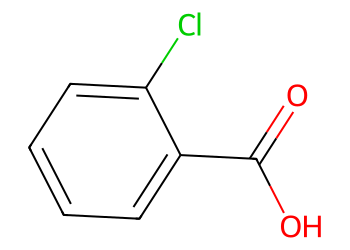

rings: <rdkit.rdBase._vectclass std::vector<int,class std::allocator<int> > object at 0x000001BD83559EC0>
bond 0 0 - 1 order 2
bond 1 1 - 2 order 1
bond 2 1 - 3 order 1
bond 3 3 - 4 order 1
bond 4 4 - 5 order 1
bond 5 5 - 6 order 1
bond 6 6 - 7 order 1
bond 7 7 - 8 order 1
bond 8 8 - 9 order 1
bond 9 8 - 3 order 1


In [35]:
from rdkit import Chem
from rdkit.Chem import Draw

smi = "O=C(O)c1ccccc1Cl"

mol = Chem.MolFromSmiles(smi)
display(Draw.MolToImage(mol, size=(350, 250), includeAtomNumbers=True))

num_rings = Chem.GetSSSR(mol)
print("rings:", num_rings)

for b in mol.GetBonds():
    print("bond", b.GetIdx(), b.GetBeginAtomIdx(), "-", b.GetEndAtomIdx(), "order", int(b.GetBondTypeAsDouble()))

### Solution 8.2

In [36]:
import pandas as pd
from rdkit.Chem import Descriptors, Crippen, rdMolDescriptors

names = ["Cn1cnc2N(C)C(=O)N(C)C(=O)c12", "CC(=O)Nc1ccc(O)cc1", "CC(C)Cc1ccc(cc1)C(C)C(O)=O"]
rows = []
for nm in names:
    m = Chem.MolFromSmiles(nm)
    rows.append({
        "smiles": nm,
        "MolWt": Descriptors.MolWt(m),
        "LogP": Crippen.MolLogP(m),
        "HBD": rdMolDescriptors.CalcNumHBD(m),
        "HBA": rdMolDescriptors.CalcNumHBA(m),
        "TPSA": rdMolDescriptors.CalcTPSA(m)
    })

pd.DataFrame(rows)

,smiles,MolWt,LogP,HBD,HBA,TPSA
0,Cn1cnc2N(C)C(=O)N(C)C(=O)c12,194.194,-1.0293,0,6,61.82
1,CC(=O)Nc1ccc(O)cc1,151.165,1.3506,2,2,49.33
2,CC(C)Cc1ccc(cc1)C(C)C(O)=O,206.285,3.0732,1,1,37.30


### Solution 8.3

O=C(O)c1ccc(F)cc1


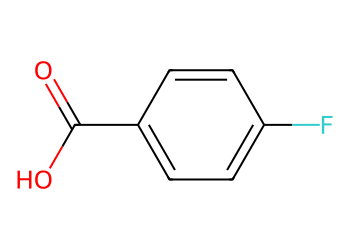

In [37]:
find = Chem.MolFromSmiles("Cl")
put  = Chem.MolFromSmiles("F")
mol  = Chem.MolFromSmiles("Clc1ccc(cc1)C(=O)O")
out  = Chem.ReplaceSubstructs(mol, find, put, replaceAll=True)[0]
print(Chem.MolToSmiles(out))
Draw.MolToImage(out, size=(350, 250))

### Solution 8.4

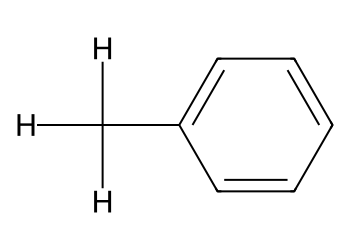

In [38]:
mol = Chem.MolFromSmiles("c1ccccc1")
em = Chem.EditableMol(mol)

idx_C = em.AddAtom(Chem.Atom("C"))
idx_H1 = em.AddAtom(Chem.Atom("H"))
idx_H2 = em.AddAtom(Chem.Atom("H"))
idx_H3 = em.AddAtom(Chem.Atom("H"))

em.AddBond(2, idx_C, order=Chem.BondType.SINGLE)
em.AddBond(idx_C, idx_H1, order=Chem.BondType.SINGLE)
em.AddBond(idx_C, idx_H2, order=Chem.BondType.SINGLE)
em.AddBond(idx_C, idx_H3, order=Chem.BondType.SINGLE)

mol2 = em.GetMol()
Chem.SanitizeMol(mol2)
Draw.MolToImage(mol2, size=(350, 250), includeAtomNumbers=True)